# Classification Model Performance

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/classification_model_performance

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 153 (delta 66), reused 124 (delta 37), pack-reused 0
Receiving objects: 100% (153/153), 33.98 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/machine_learning_1/classification_model_performance


In [2]:
import pandas
import matplotlib.pyplot as plt

## Loading dataset

First, we use pandas to load the dataset from a csv file.

In [3]:
data = pandas.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


### Features-labels split and train-validation split

In [4]:
features = data.drop(["Survived"], axis=1)
labels = data["Survived"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [7]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [8]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### Training model on our dataset


In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation

#### Accuracy

In [10]:
print("Scores of the model")
# use model score to print model accuracy
lr_model.score(features_test, labels_test)

Scores of the model


0.7988826815642458

#### False Positives, False Negatives and Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use sklearn confusion_matrix, ConfusionMatrixDisplay to plot the confusion matrix
predictions = lr_model.predict(features_test)
cm = confusion_matrix(labels_test, predictions, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_model.classes_)

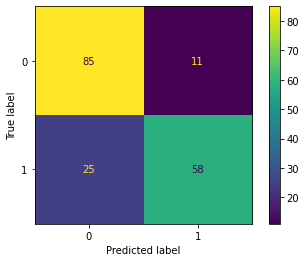

In [12]:
disp.plot()

#### Recall, Precision and F1-score

In [13]:
from sklearn.metrics import f1_score,recall_score,precision_score
# use sklearn f1_score,recall_score,precision_score to print the f1_score,recall_score,precision_score
# don't use average parameter
print(f1_score(labels_test, predictions, average=None))
print(recall_score(labels_test, predictions, average=None))
print(precision_score(labels_test, predictions, average=None))

[0.82524272 0.76315789]
[0.88541667 0.69879518]
[0.77272727 0.84057971]


### ROC and AUC

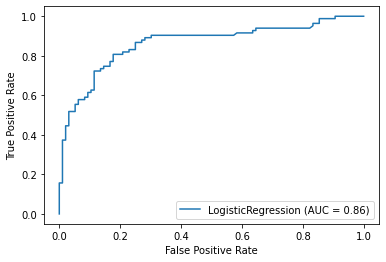

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr_model, features_test, labels_test)  
plt.show()                                   